In [34]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier,export_graphviz
import graphviz
from sklearn.model_selection import train_test_split

In [35]:
df=pd.read_csv('/kaggle/input/heart-attack-analysis-and-prediction-dataset/heart.csv')

In [36]:
df.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


string, object yok yani hepsi sayısal hepsi makine öğrenmesi modeline girebilir. dummiese gerek yok.

In [38]:
y=df['output']
x=df.drop("output",axis=1)

In [39]:
tree=DecisionTreeClassifier()
model=tree.fit(x,y)
#fit öğrenme neyi, hangi sıra ile soracak burada öğreniyor.

In [40]:
model.score(x,y)
#1 çıktı yuzde yuz tahmin ediyor cevap veriyor

1.0

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=16,train_size=0.70)

In [42]:
#Şimdi aynılarını train test splitle yapalım

tree=DecisionTreeClassifier()
model=tree.fit(x_train,y_train)
model.score(x_test,y_test)

0.7912087912087912

Yukarıda, yüzde 100 çıktı burada neden yüzde 77 çıktı. Demek ki ezberlemiş öğrenmemiş. Yani aşırı öğrenmiş böylelikle test etmiş olduk 16 tanesini aldık, yüzde 70 ini eğittik, eğitmediklerimizi test ederek aşırı mı öğrenmiş normal mi görmüş olduk.

In [43]:
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [44]:
model.predict([[22,0,2,130,240,0,0,150,0,2,0,0,2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

1 çıktı, yani bu değerlerde birinin yüksek kalp krizi riski var.
Şimdi ise bu bulduklarımızı görselleştirelim.

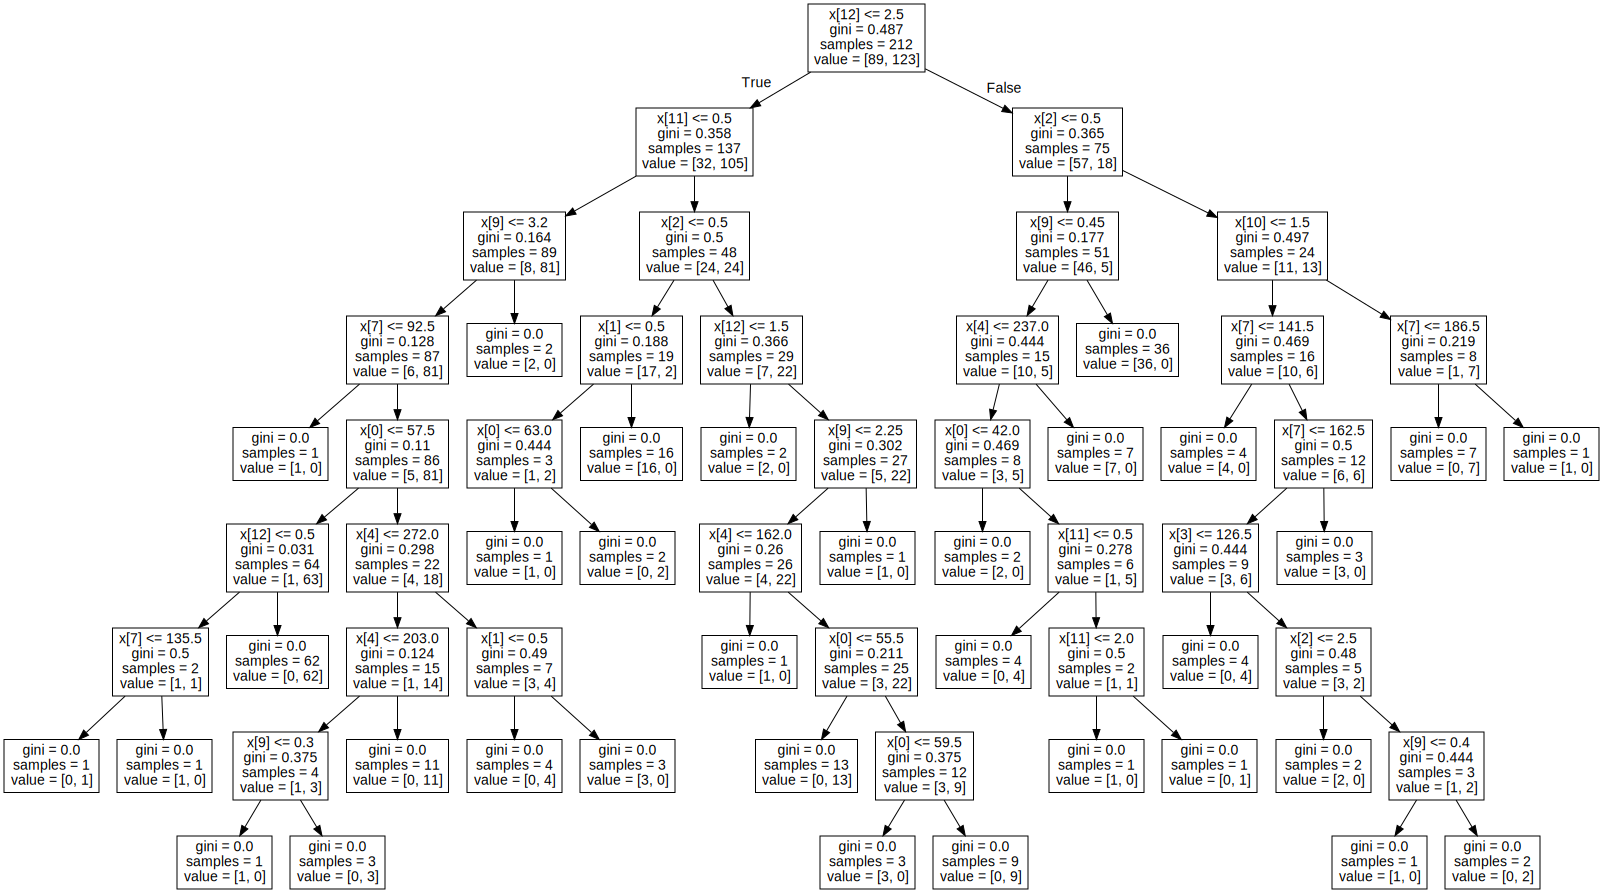

In [45]:
dot=export_graphviz(model)
gorsel=graphviz.Source(dot)
gorsel